## M.VAISHNAVI
## 2211CS010336
## Industry Wise Sanctions for the Year 2022-2023[govt data set]

DATA DESCRIPTION: The dataset presents financial data related to various industries, potentially indicating government investments or economic sector performance. It consists of 46 rows and 8 columns, but only the first three columns.Serial Number (Sl No), Industry, and Rs in Crore (Financial Value)contain meaningful data. The industries listed include sectors such as Hotel & Restaurant, Health, Construction, Food & Beverages, and Engineering, each associated with a monetary value measured in crores. However, the dataset has notable issues, including missing data, with only 16 valid rows containing relevant values, and five completely empty columns labeled as Unnamed: 3 to Unnamed: 7, likely resulting from improper formatting. The dataset could serve multiple analytical purposes, such as evaluating government spending patterns, comparing economic sectors, and assessing policy impacts on industry growth. However, before further analysis, it requires data cleaning, including the removal of unnecessary columns and handling of missing values. If additional metadata such as the financial year, funding source, or department responsible were available, it could provide a more comprehensive understanding of the dataset’s context and significance.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
file_path = "govt.csv"  
df = pd.read_csv(file_path)

Loads the dataset govt.csv into a DataFrame using Pandas

In [5]:
df_cleaned = df[['Sl No', 'Industry', 'Rs in crore']].dropna()

Selects relevant columns (Sl No, Industry, Rs in Crore) and removes missing values.

In [6]:
df_cleaned['Rs in crore'] = pd.to_numeric(df_cleaned['Rs in crore'], errors='coerce')

 Converts the Rs in Crore column to numeric format, handling errors.



In [7]:

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sl No        16 non-null     float64
 1   Industry     16 non-null     object 
 2   Rs in crore  16 non-null     float64
dtypes: float64(2), object(1)
memory usage: 512.0+ bytes


Displays dataset structure, including column data types and non-null counts.

In [8]:
print("\nFirst Five Rows:\n",df_cleaned.head())


First Five Rows:
    Sl No                     Industry  Rs in crore
0    1.0     Hotel / Restaurant etc.        151.81
1    2.0                Health Sector        84.83
2    3.0  Construction activity (CRE)        36.61
3    4.0             Food & Beverages        81.87
4    5.0                 Engineering        128.69


displays the first five rows

In [9]:
print("\nSummary Statistics:\n", df_cleaned.describe())


Summary Statistics:
            Sl No  Rs in crore
count  16.000000    16.000000
mean    8.500000    51.695625
std     4.760952    47.269057
min     1.000000     0.750000
25%     4.750000    17.645000
50%     8.500000    30.900000
75%    12.250000    82.610000
max    16.000000   151.810000


description of cleaned data

In [10]:
print("\nTop Industries by Investment:\n", df_cleaned.sort_values(by='Rs in crore', ascending=False))


Top Industries by Investment:
     Sl No                            Industry  Rs in crore
0     1.0            Hotel / Restaurant etc.        151.81
4     5.0                        Engineering        128.69
6     7.0         Miscellaneous Manufacturing       115.02
1     2.0                       Health Sector        84.83
3     4.0                    Food & Beverages        81.87
5     6.0              Non-metallic Products         65.53
9    10.0       Textiles & Readymade Garments        39.38
2     3.0         Construction activity (CRE)        36.61
7     8.0                           Chemicals        25.19
12   13.0                         Basic Metal        23.81
15   16.0              Paper & Paper products        18.36
14   15.0  Wood & Cork / Furniture & Fixtures        17.95
8     9.0                              Others        16.73
13   14.0     Transport / Transport equipment        10.34
11   12.0               Printing & Publishing        10.26
10   11.0            Rub

sorting values based on Rs in crore

DATA VISUALIZATION

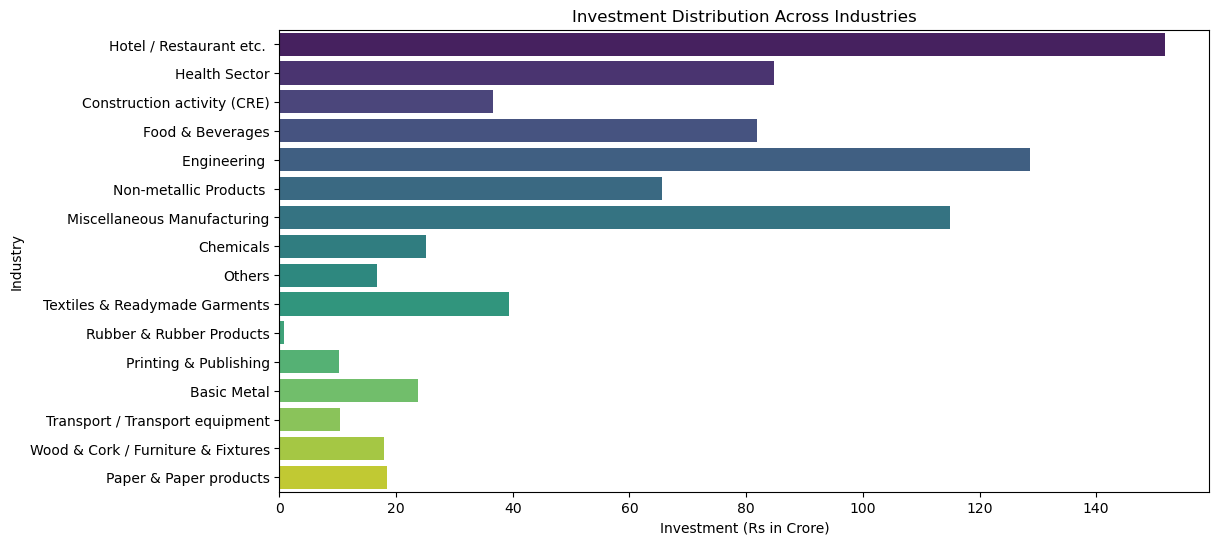

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Rs in crore", y="Industry", data=df_cleaned, hue="Industry", palette="viridis", legend=False)
plt.xlabel("Investment (Rs in Crore)")
plt.ylabel("Industry")
plt.title("Investment Distribution Across Industries")
plt.show()

bar graph: industry vs investment

In [12]:
max_investment = df_cleaned.loc[df_cleaned['Rs in crore'].idxmax()]
min_investment = df_cleaned.loc[df_cleaned['Rs in crore'].idxmin()]
print("\nIndustry with Maximum Investment:\n", max_investment)
print("\nIndustry with Minimum Investment:\n", min_investment)


Industry with Maximum Investment:
 Sl No                               1.0
Industry       Hotel / Restaurant etc. 
Rs in crore                      151.81
Name: 0, dtype: object

Industry with Minimum Investment:
 Sl No                              11.0
Industry       Rubber & Rubber Products
Rs in crore                        0.75
Name: 10, dtype: object


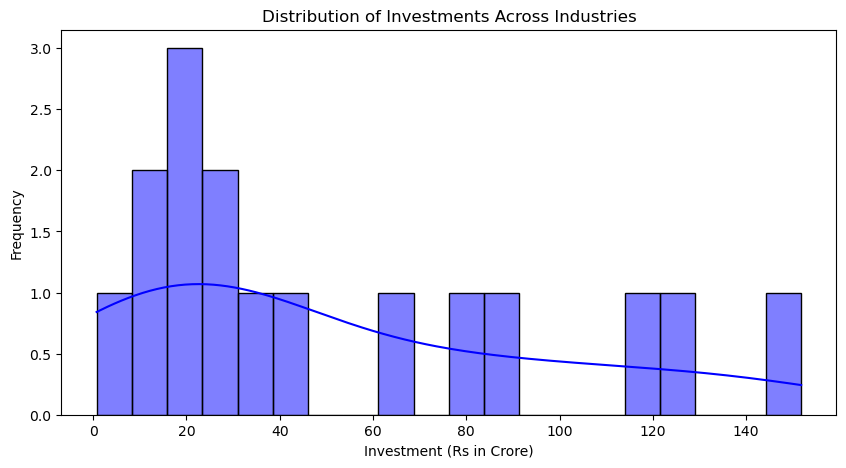

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['Rs in crore'], bins=20, kde=True, color='blue')
plt.xlabel("Investment (Rs in Crore)")
plt.ylabel("Frequency")
plt.title("Distribution of Investments Across Industries")
plt.show()

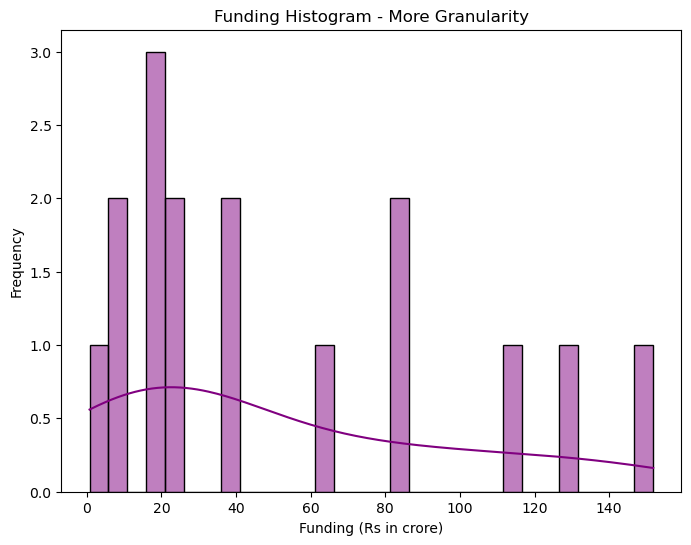

In [14]:
#Histograms
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Rs in crore'], bins=30, kde=True, color='purple')
plt.title('Funding Histogram - More Granularity')
plt.xlabel('Funding (Rs in crore)')
plt.ylabel('Frequency')
plt.show()


In [15]:
q1 = df_cleaned['Rs in crore'].quantile(0.25)
q3 = df_cleaned['Rs in crore'].quantile(0.75)
iqr = q3 - q1
outliers = df_cleaned[(df_cleaned['Rs in crore'] < (q1 - 1.5 * iqr)) | (df_cleaned['Rs in crore'] > (q3 + 1.5 * iqr))]
print("\nOutliers in Investment:\n", outliers)


Outliers in Investment:
 Empty DataFrame
Columns: [Sl No, Industry, Rs in crore]
Index: []


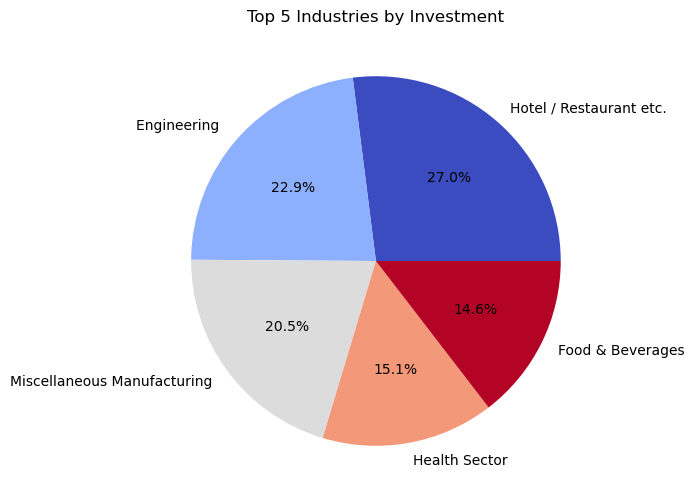

In [16]:
top_5_industries = df_cleaned.groupby('Industry')['Rs in crore'].sum().nlargest(5)
plt.figure(figsize=(8, 6))
top_5_industries.plot(kind='pie', autopct='%1.1f%%', colormap='coolwarm')
plt.ylabel("")
plt.title("Top 5 Industries by Investment")
plt.show()

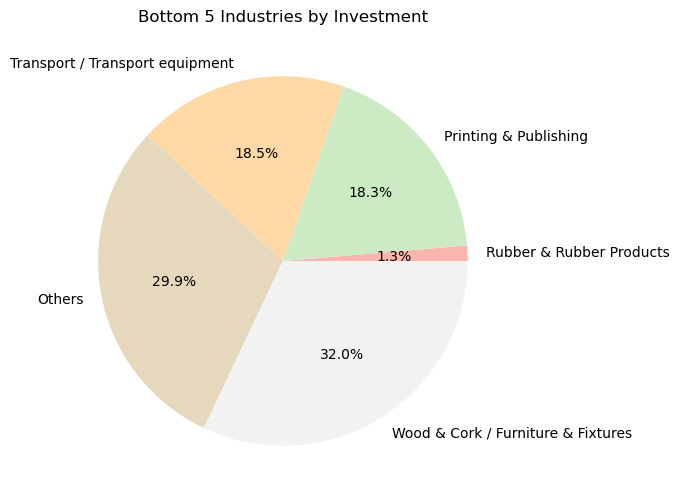

In [17]:
bottom_5_industries = df_cleaned.groupby('Industry')['Rs in crore'].sum().nsmallest(5)
plt.figure(figsize=(8, 6))
bottom_5_industries.plot(kind='pie', autopct='%1.1f%%', colormap='Pastel1')
plt.ylabel("")
plt.title("Bottom 5 Industries by Investment")
plt.show()

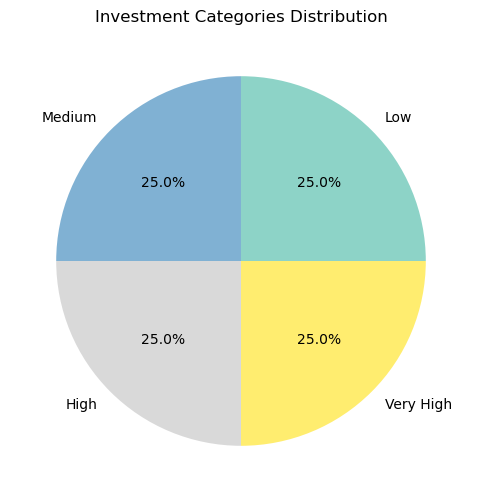

In [21]:
df_cleaned['Investment Category'] = pd.qcut(df_cleaned['Rs in crore'], q=4, labels=["Low", "Medium", "High", "Very High"])
plt.figure(figsize=(8, 6))
df_cleaned['Investment Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap='Set3')
plt.ylabel("")
plt.title("Investment Categories Distribution")
plt.show()

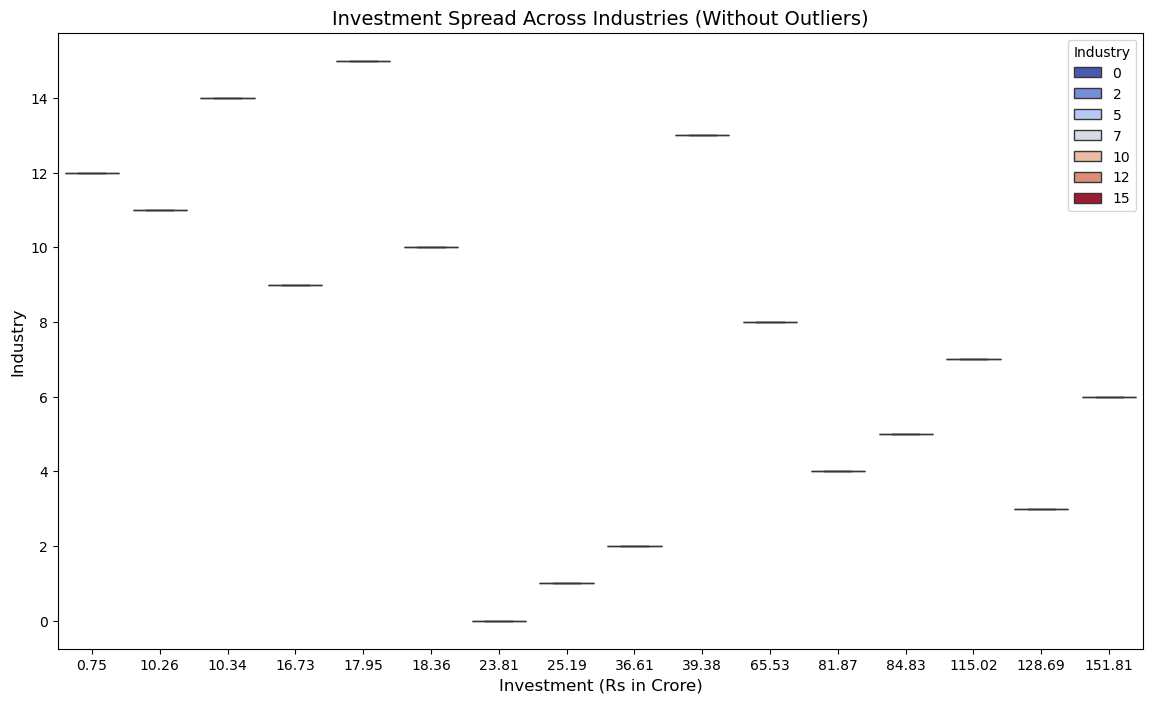

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 8))


sns.boxplot(
    x="Rs in crore", 
    y="Industry", 
    data=df_cleaned, 
    hue="Industry",  
    dodge=False,  
    palette="coolwarm", 
    showfliers=False  
)


plt.xlabel("Investment (Rs in Crore)", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.title("Investment Spread Across Industries (Without Outliers)", fontsize=14)


plt.show()


C:\Users\vashnavi\AppData\Local\Temp\ipykernel_2532\1344545323.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Industry', y='Rs in crore', data=df_cleaned, palette='coolwarm')


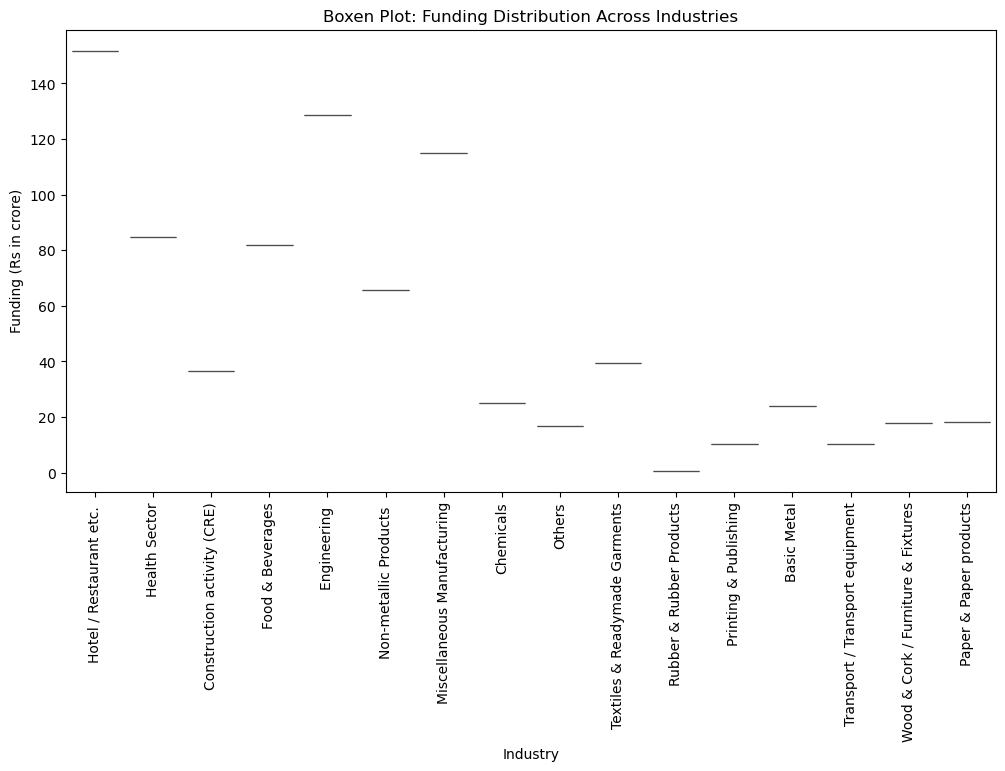

In [23]:
# Boxen Plots
plt.figure(figsize=(12, 6))
sns.boxenplot(x='Industry', y='Rs in crore', data=df_cleaned, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Boxen Plot: Funding Distribution Across Industries')
plt.xlabel('Industry')
plt.ylabel('Funding (Rs in crore)')
plt.show()


In [24]:
missing_values = df_cleaned.isnull().sum()
total_values = df_cleaned.shape[0]
missing_percentage = (missing_values / total_values) * 100
print("\nMissing Values Percentage:\n", missing_percentage)


Missing Values Percentage:
 Sl No                  0.0
Industry               0.0
Rs in crore            0.0
Investment Category    0.0
dtype: float64


In [25]:
duplicate_records = df_cleaned.duplicated().sum()
print("\nNumber of Duplicate Records:", duplicate_records)


Number of Duplicate Records: 0


In [26]:
unique_industries = df_cleaned['Industry'].nunique()
print("\nNumber of Unique Industries:", unique_industries)


Number of Unique Industries: 16


In [27]:
q1 = df_cleaned['Rs in crore'].quantile(0.25)
q3 = df_cleaned['Rs in crore'].quantile(0.75)
iqr = q3 - q1
outliers = df_cleaned[(df_cleaned['Rs in crore'] < (q1 - 1.5 * iqr)) | (df_cleaned['Rs in crore'] > (q3 + 1.5 * iqr))]
outlier_percentage = (outliers.shape[0] / total_values) * 100
print("\nOutlier Percentage in Investment Data:", round(outlier_percentage, 2), "%")


Outlier Percentage in Investment Data: 0.0 %


In [28]:
data_quality_score = 100 - (missing_percentage.sum() + outlier_percentage)
print("\nEstimated Data Quality Score:", round(data_quality_score, 2), "%")


Estimated Data Quality Score: 100.0 %


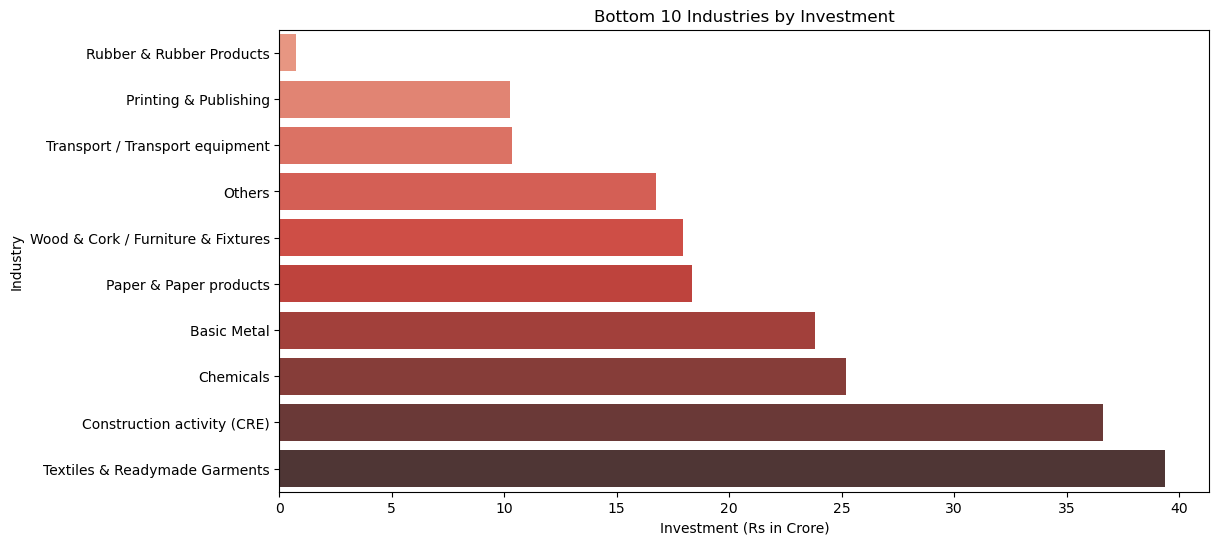

In [29]:
plt.figure(figsize=(12, 6))
bottom_10_industries = df_cleaned.groupby('Industry')['Rs in crore'].sum().nsmallest(10)
sns.barplot(x=bottom_10_industries.values, y=bottom_10_industries.index, hue=bottom_10_industries.index, palette="Reds_d", legend=False)
plt.xlabel("Investment (Rs in Crore)")
plt.ylabel("Industry")
plt.title("Bottom 10 Industries by Investment")
plt.show()

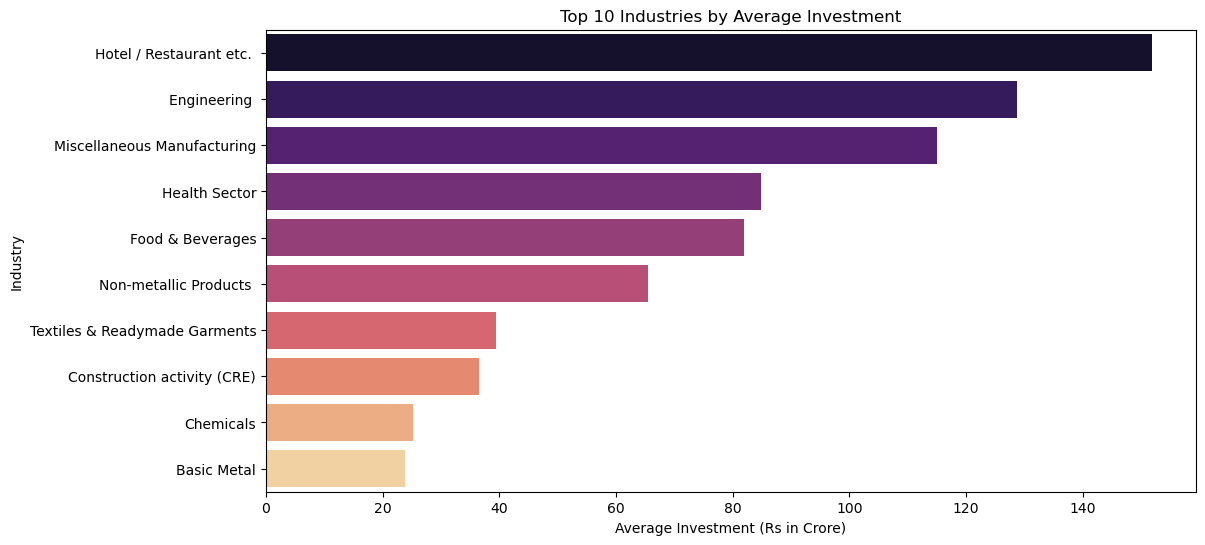

In [30]:
plt.figure(figsize=(12, 6))
avg_investment = df_cleaned.groupby('Industry')['Rs in crore'].mean().nlargest(10)
sns.barplot(x=avg_investment.values, y=avg_investment.index, hue=avg_investment.index, palette="magma", legend=False)
plt.xlabel("Average Investment (Rs in Crore)")
plt.ylabel("Industry")
plt.title("Top 10 Industries by Average Investment")
plt.show()

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

file_path = "govt.csv" 
df = pd.read_csv(file_path)

df_cleaned = df[['Industry', 'Rs in crore']].dropna()

df_cleaned['Rs in crore'] = pd.to_numeric(df_cleaned['Rs in crore'], errors='coerce')

le = LabelEncoder()
df_cleaned['Industry'] = le.fit_transform(df_cleaned['Industry'])

median_investment = df_cleaned['Rs in crore'].median()
df_cleaned['Investment Category'] = df_cleaned['Rs in crore'].apply(lambda x: 1 if x > median_investment else 0)

X = df_cleaned[['Industry', 'Rs in crore']]
y = df_cleaned['Investment Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=500, max_depth=20, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [32]:
import matplotlib.pyplot as plt

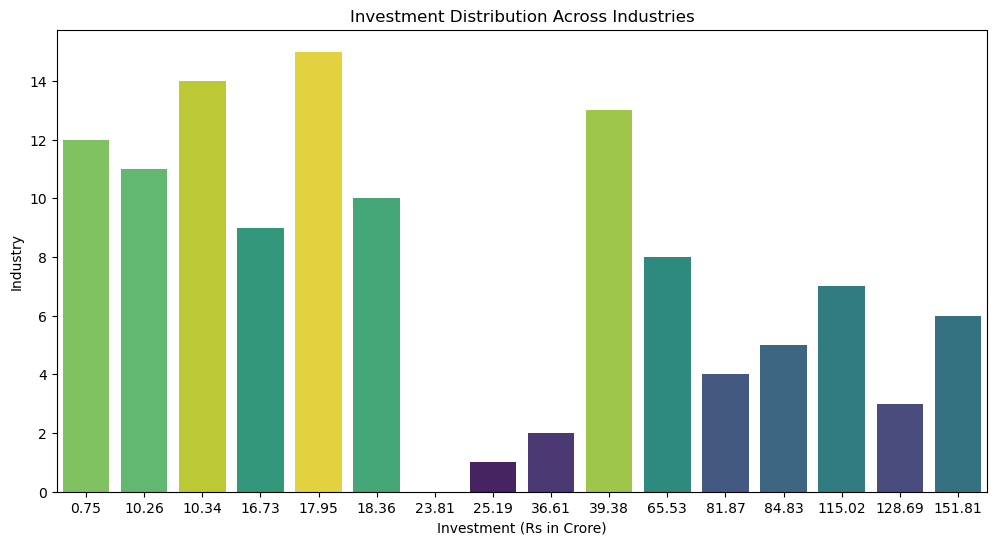

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Rs in crore", y="Industry", data=df_cleaned, hue="Industry", palette="viridis", legend=False)
plt.xlabel("Investment (Rs in Crore)")
plt.ylabel("Industry")
plt.title("Investment Distribution Across Industries")
plt.show()

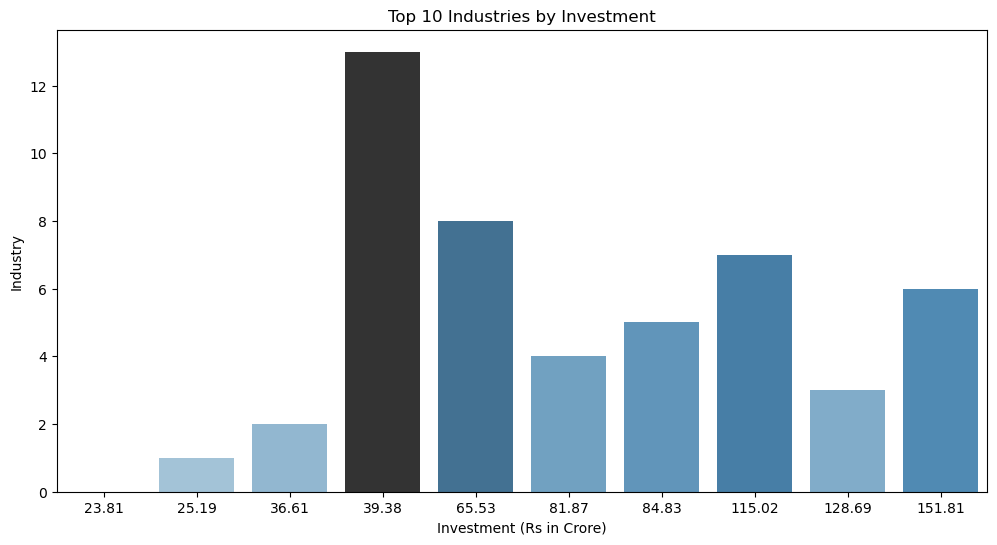

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
top_10_industries = df_cleaned.groupby('Industry')['Rs in crore'].sum().nlargest(10)

sns.barplot(x=top_10_industries.values, y=top_10_industries.index, hue=top_10_industries.index, palette="Blues_d", legend=False)
plt.xlabel("Investment (Rs in Crore)")
plt.ylabel("Industry")
plt.title("Top 10 Industries by Investment")
plt.show()

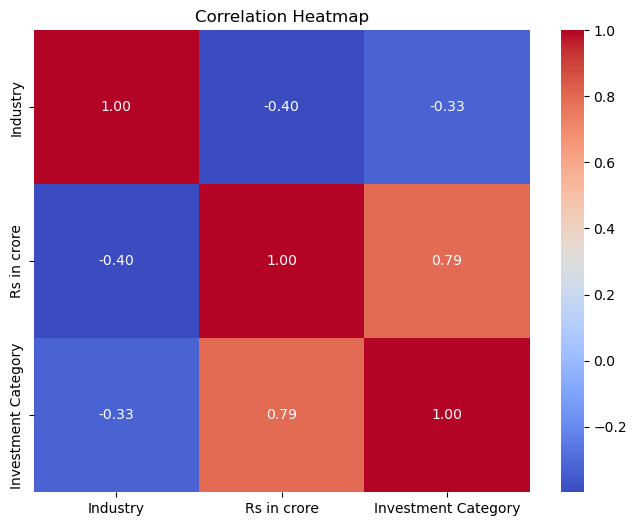

In [35]:
import numpy as np

plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

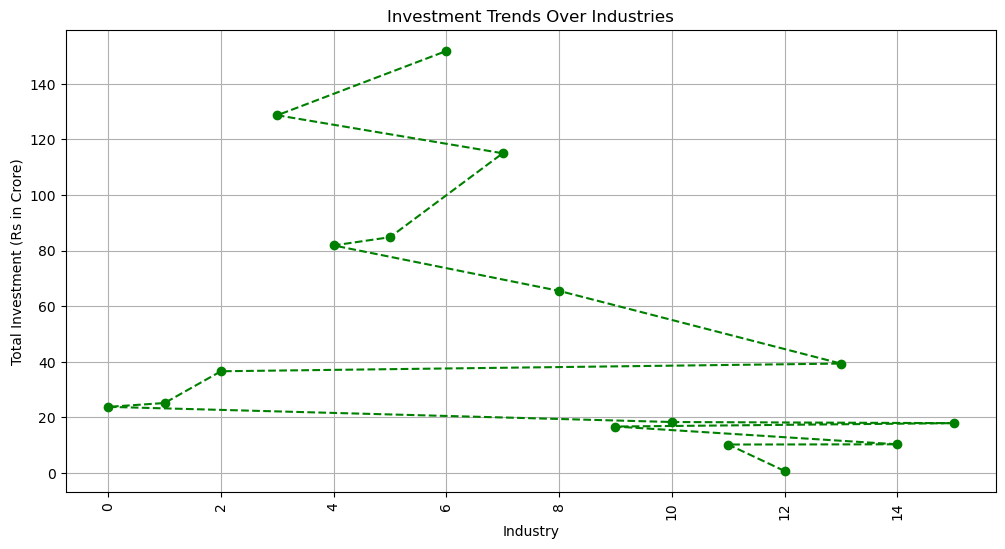

In [36]:
plt.figure(figsize=(12, 6))
investment_trend = df_cleaned.groupby('Industry')['Rs in crore'].sum().sort_values()
investment_trend.plot(kind='line', marker='o', color='green', linestyle='dashed')

plt.xlabel("Industry")
plt.ylabel("Total Investment (Rs in Crore)")
plt.title("Investment Trends Over Industries")
plt.xticks(rotation=90)
plt.grid()
plt.show()

kde plots

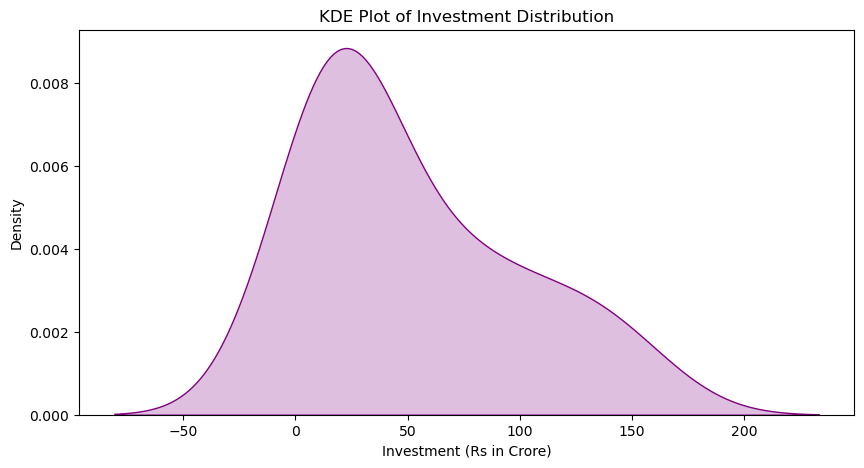

In [37]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df_cleaned['Rs in crore'], fill=True, color="purple")
plt.xlabel("Investment (Rs in Crore)")
plt.ylabel("Density")
plt.title("KDE Plot of Investment Distribution")
plt.show()

C:\Users\vashnavi\AppData\Local\Temp\ipykernel_2532\3488218237.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['Rs in crore'], shade=True, color="green")


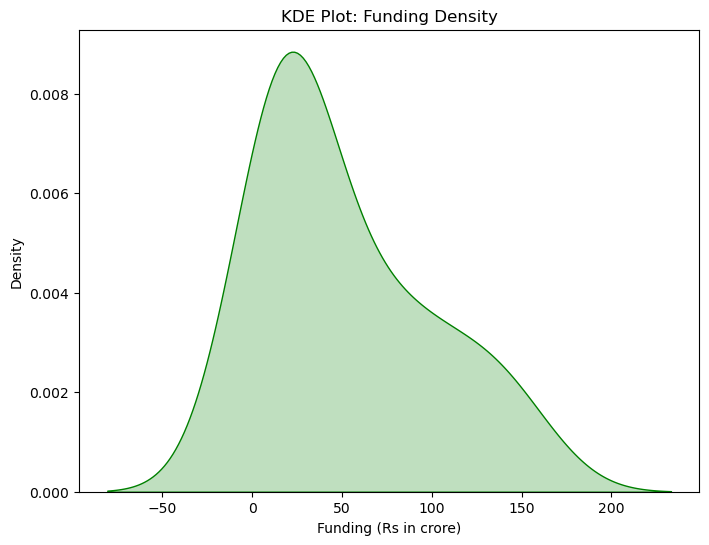

In [38]:
# KDE Plots
plt.figure(figsize=(8, 6))
sns.kdeplot(df_cleaned['Rs in crore'], shade=True, color="green")
plt.title('KDE Plot: Funding Density')
plt.xlabel('Funding (Rs in crore)')
plt.show()



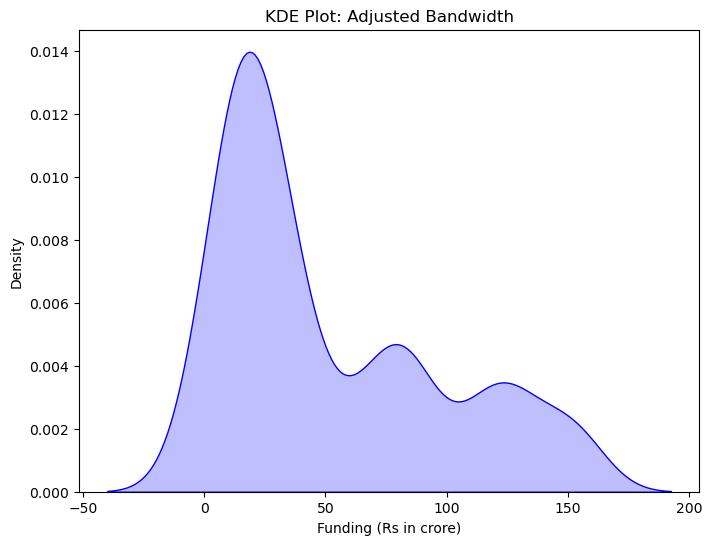

In [39]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df_cleaned['Rs in crore'], bw_adjust=0.5, fill=True, color="blue")
plt.title('KDE Plot: Adjusted Bandwidth')
plt.xlabel('Funding (Rs in crore)')
plt.show()

pair plot on investment data

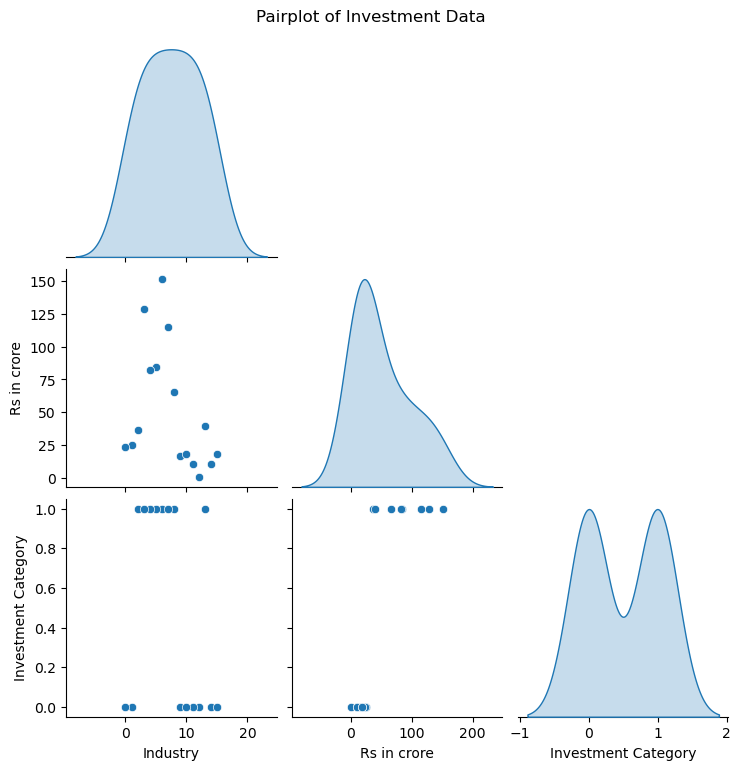

In [40]:
sns.pairplot(df_cleaned, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Investment Data", y=1.02)
plt.show()

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df_cleaned['Investment_Category'] = df_cleaned['Rs in crore'].apply(lambda x: 1 if x > df_cleaned['Rs in crore'].median() else 0)

features = df_cleaned[['Rs in crore']]
target = df_cleaned['Investment_Category']

scaler = StandardScaler()
X = scaler.fit_transform(features)
model = LogisticRegression()
model.fit(X, target)
y_pred = model.predict(X)

accuracy = accuracy_score(target, y_pred)
print(f"\nClassification Model Accuracy: {accuracy * 100:.2f}%")


Classification Model Accuracy: 87.50%


In [42]:
investment_stats = df_cleaned['Rs in crore'].describe()
print("\nInvestment Data Summary:\n", investment_stats)

skewness = df_cleaned['Rs in crore'].skew()
kurtosis = df_cleaned['Rs in crore'].kurtosis()
print("\nSkewness:", skewness)
print("Kurtosis:", kurtosis)


Investment Data Summary:
 count     16.000000
mean      51.695625
std       47.269057
min        0.750000
25%       17.645000
50%       30.900000
75%       82.610000
max      151.810000
Name: Rs in crore, dtype: float64

Skewness: 0.9683713707814128
Kurtosis: -0.28492888316950005


C:\Users\vashnavi\AppData\Local\Temp\ipykernel_2532\3368654346.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Industry', y='Rs in crore', data=df_cleaned, palette='viridis')


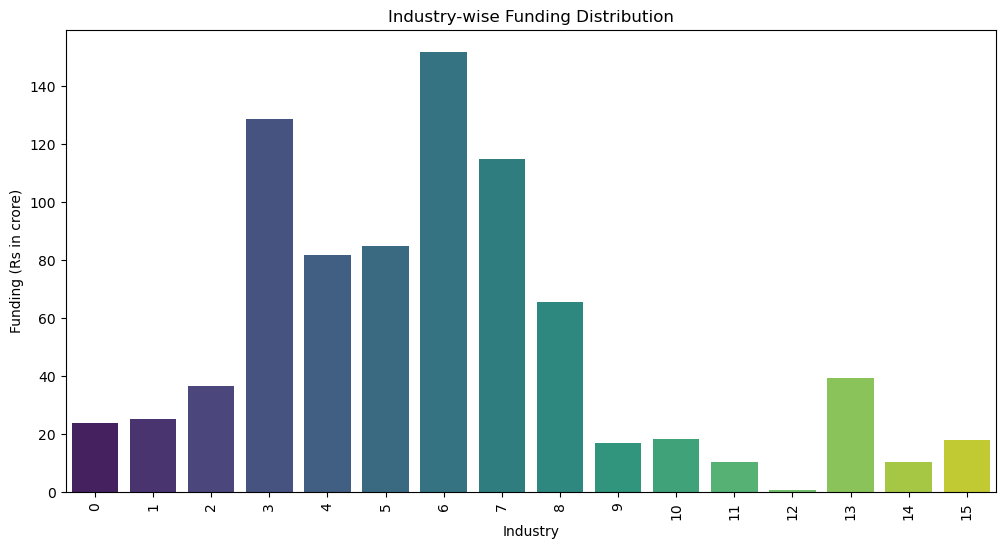

In [43]:
# Bar Chart: Industry-wise Funding Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x='Industry', y='Rs in crore', data=df_cleaned, palette='viridis')
plt.xticks(rotation=90)
plt.title('Industry-wise Funding Distribution')
plt.xlabel('Industry')
plt.ylabel('Funding (Rs in crore)')
plt.show()


C:\Users\vashnavi\AppData\Local\Temp\ipykernel_2532\2412856159.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Industry', y='Rs in crore', data=df_cleaned, palette='magma', ci=None)
C:\Users\vashnavi\AppData\Local\Temp\ipykernel_2532\2412856159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Industry', y='Rs in crore', data=df_cleaned, palette='magma', ci=None)


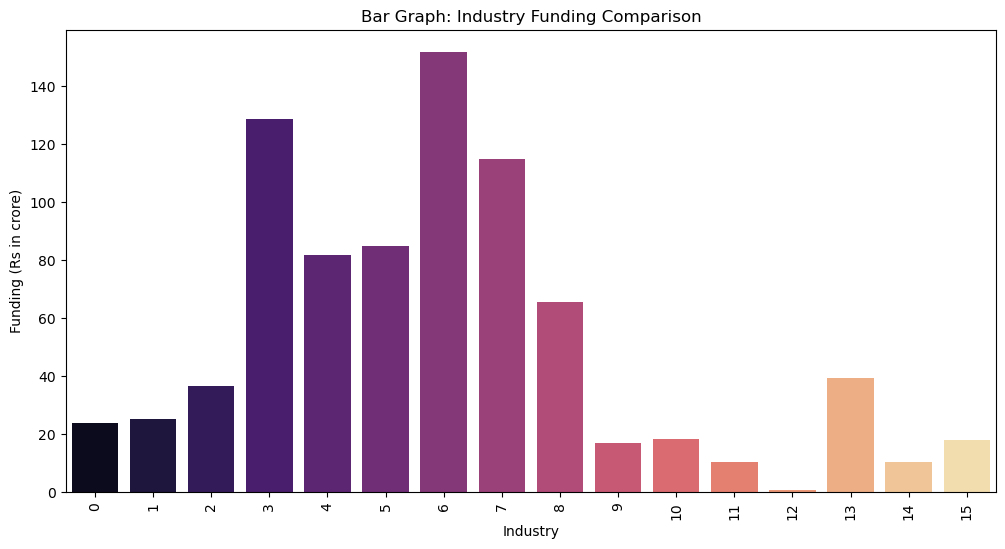

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Industry', y='Rs in crore', data=df_cleaned, palette='magma', ci=None)
plt.xticks(rotation=90)
plt.title('Bar Graph: Industry Funding Comparison')
plt.xlabel('Industry')
plt.ylabel('Funding (Rs in crore)')
plt.show()


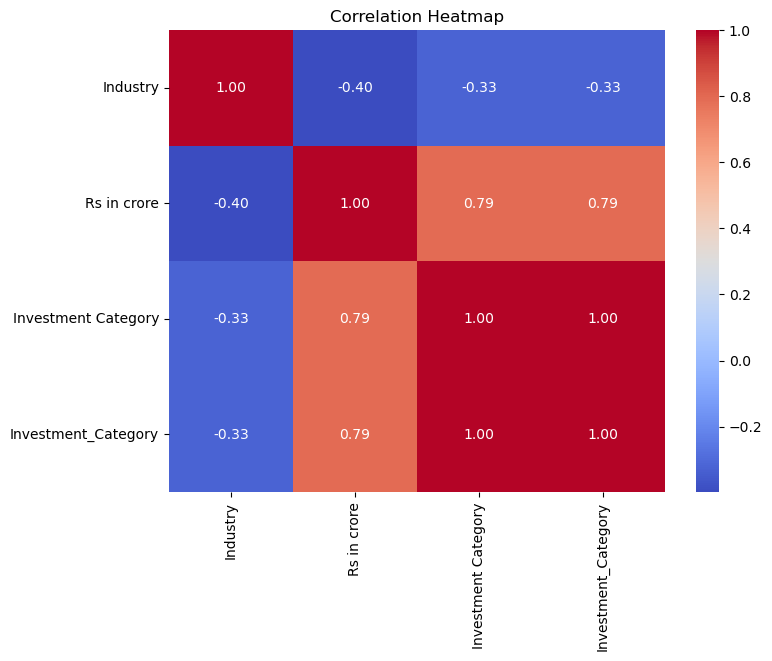

In [45]:
# Heatmap: Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


C:\Users\vashnavi\AppData\Local\Temp\ipykernel_2532\2291990811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Industry', y='Rs in crore', data=df_cleaned, palette='coolwarm')


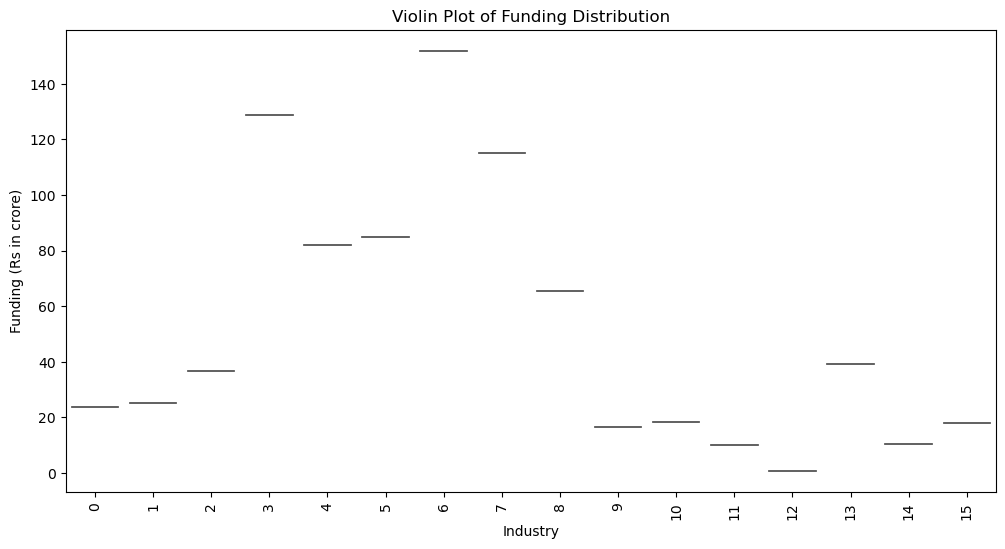

In [46]:



# Violin Plot: Funding Distribution Across Industries
plt.figure(figsize=(12, 6))
sns.violinplot(x='Industry', y='Rs in crore', data=df_cleaned, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Violin Plot of Funding Distribution')
plt.xlabel('Industry')
plt.ylabel('Funding (Rs in crore)')
plt.show()



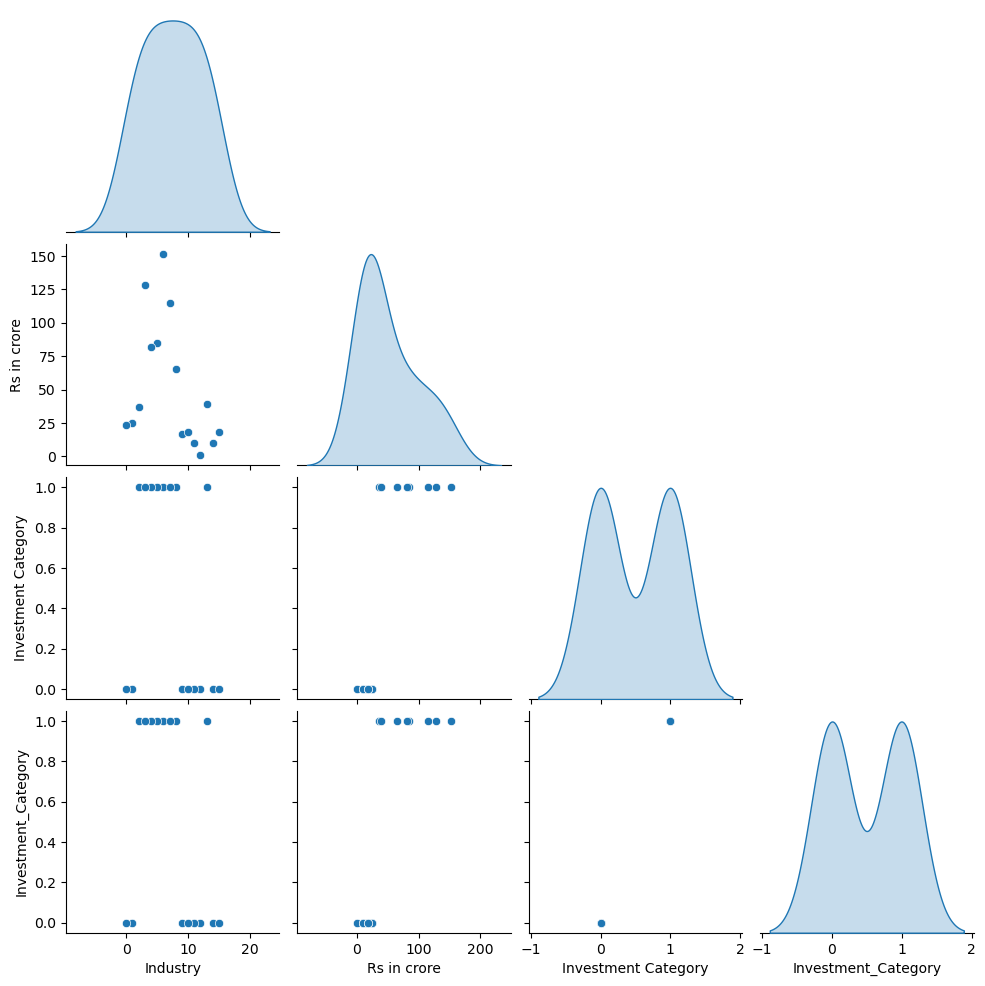

In [47]:
# Pair Plot: Pairwise Relationships Between Numerical Features
sns.pairplot(df_cleaned, diag_kind='kde', corner=True)
plt.show()


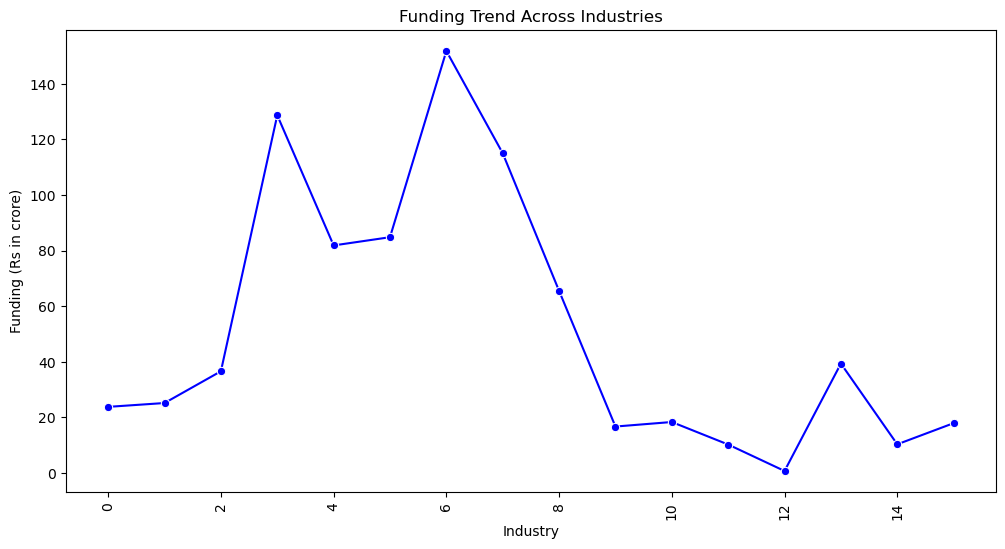

In [48]:
# Line Plot: Funding Trends Over Industries (Example, assuming ordering makes sense)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Industry', y='Rs in crore', data=df_cleaned, marker='o', color='b')
plt.xticks(rotation=90)
plt.title('Funding Trend Across Industries')
plt.xlabel('Industry')
plt.ylabel('Funding (Rs in crore)')
plt.show()


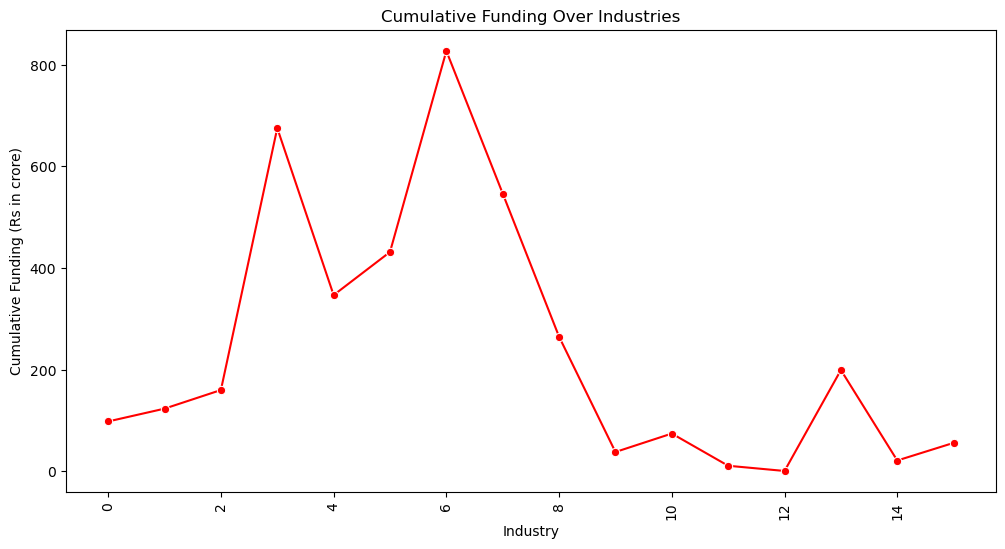

In [49]:
# Line Plot: Cumulative Funding
df_cleaned_sorted = df_cleaned.sort_values(by='Rs in crore')
df_cleaned_sorted['Cumulative Funding'] = df_cleaned_sorted['Rs in crore'].cumsum()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Industry', y='Cumulative Funding', data=df_cleaned_sorted, marker='o', color='r')
plt.xticks(rotation=90)
plt.title('Cumulative Funding Over Industries')
plt.xlabel('Industry')
plt.ylabel('Cumulative Funding (Rs in crore)')
plt.show()

C:\Users\vashnavi\AppData\Local\Temp\ipykernel_2532\1629912743.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Industry', y='Rs in crore', data=df_cleaned, jitter=True, palette='coolwarm')


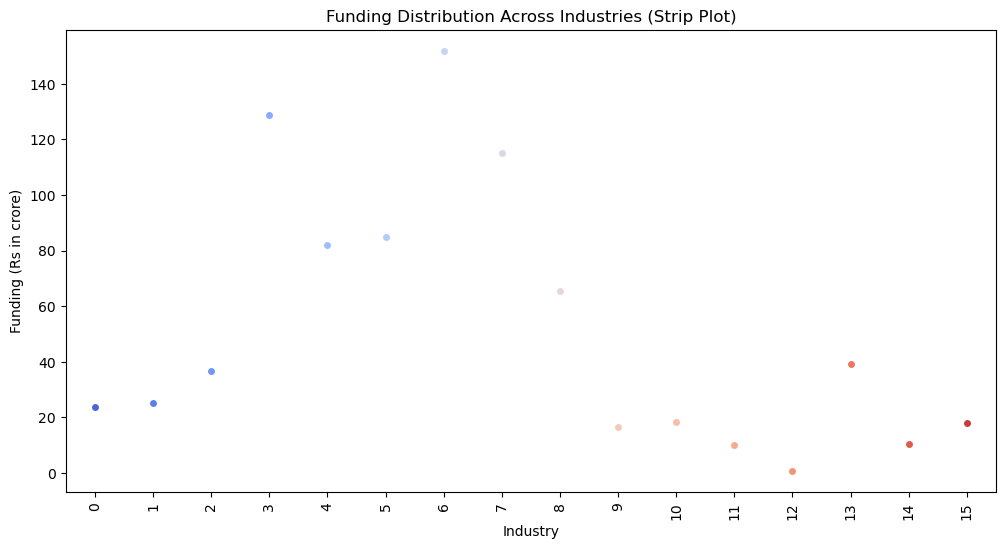

In [50]:
# Strip Plots: Industry vs. Funding
plt.figure(figsize=(12, 6))
sns.stripplot(x='Industry', y='Rs in crore', data=df_cleaned, jitter=True, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Funding Distribution Across Industries (Strip Plot)')
plt.xlabel('Industry')
plt.ylabel('Funding (Rs in crore)')
plt.show()

C:\Users\vashnavi\AppData\Local\Temp\ipykernel_2532\3316656897.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
C:\Users\vashnavi\AppData\Local\Temp\ipykernel_2532\3316656897.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)
C:\Users\vashnavi\AppData\Local\Temp\ipykernel_2532\3316656897.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)
C:\Users\vashnavi\AppData\Local\Temp\ipykernel_2532\3316656897.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoc

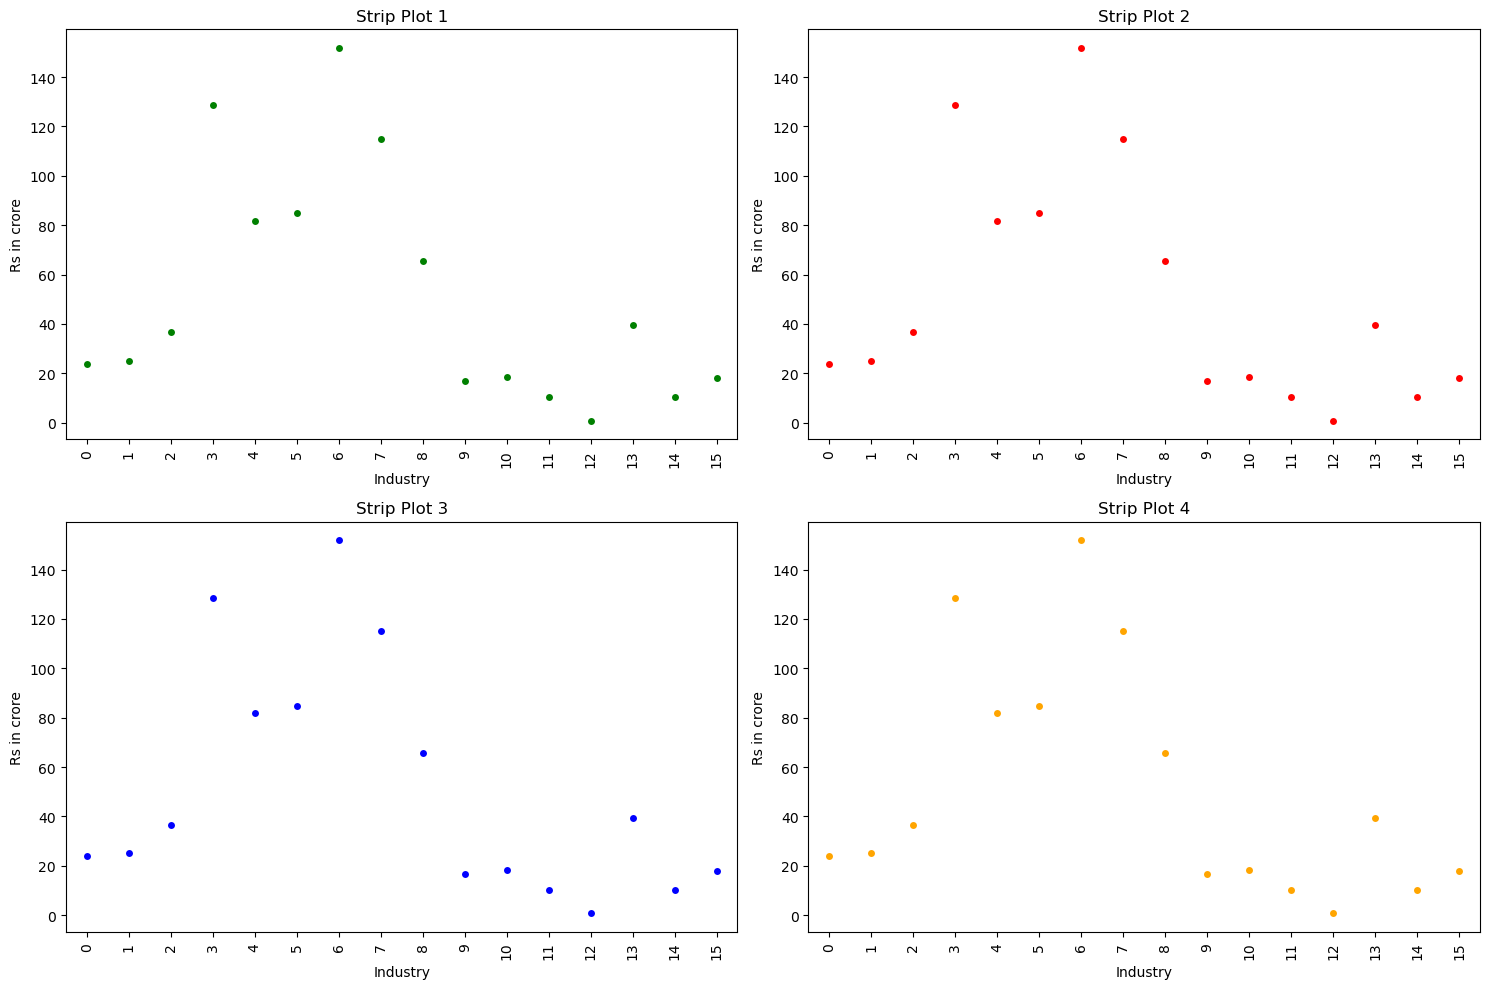

In [51]:
# Strip Plots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.stripplot(ax=axes[0, 0], x='Industry', y='Rs in crore', data=df_cleaned, jitter=True, color='g')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
axes[0, 0].set_title("Strip Plot 1")

sns.stripplot(ax=axes[0, 1], x='Industry', y='Rs in crore', data=df_cleaned, jitter=True, color='r')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)
axes[0, 1].set_title("Strip Plot 2")

sns.stripplot(ax=axes[1, 0], x='Industry', y='Rs in crore', data=df_cleaned, jitter=True, color='b')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)
axes[1, 0].set_title("Strip Plot 3")

sns.stripplot(ax=axes[1, 1], x='Industry', y='Rs in crore', data=df_cleaned, jitter=True, color='orange')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)
axes[1, 1].set_title("Strip Plot 4")

plt.tight_layout()
plt.show()


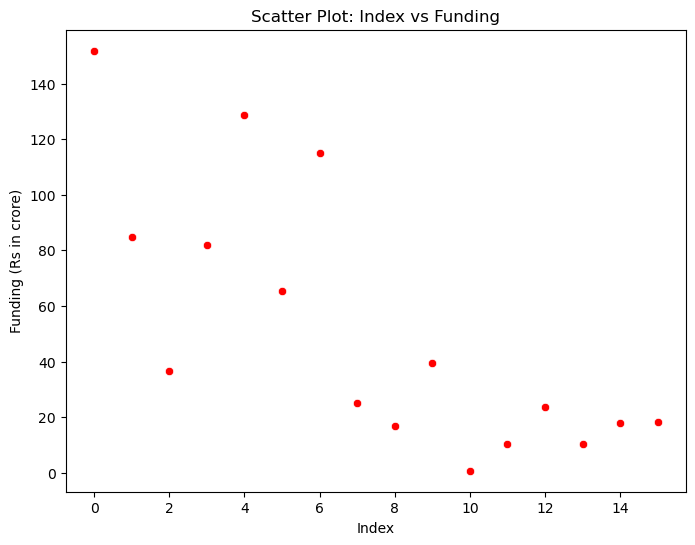

In [52]:
# Scatter Plots
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned.index, y='Rs in crore', data=df_cleaned, color='red', marker='o')
plt.title('Scatter Plot: Index vs Funding')
plt.xlabel('Index')
plt.ylabel('Funding (Rs in crore)')
plt.show()



Regression plot

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vashnavi\AppData\Local\Temp\ipykernel_2532\350467376.py:2: SyntaxWarning: invalid escape sequence '\s'
  df_cleaned.columns = df_cleaned.columns.str.replace("\s+", " ", regex=True)


Index(['index', 'Industry', 'Rs in crore', 'Investment Category',
       'Investment_Category'],
      dtype='object')


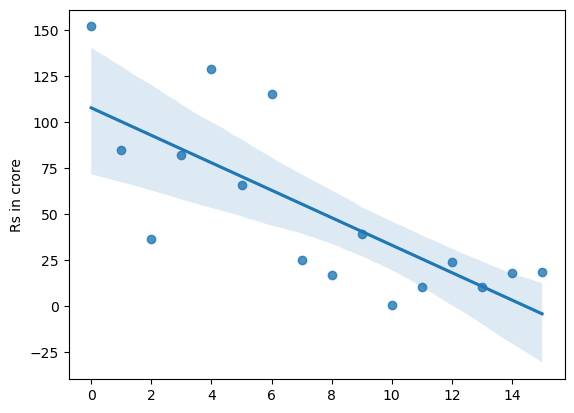

In [58]:

df_cleaned.columns = df_cleaned.columns.str.strip()
df_cleaned.columns = df_cleaned.columns.str.replace("\s+", " ", regex=True)


print(df_cleaned.columns)


if 'Sl No' in df_cleaned.columns:
    df_cleaned['Sl No'] = pd.to_numeric(df_cleaned['Sl No'], errors='coerce')
    df_cleaned.dropna(subset=['Sl No'], inplace=True)
    sns.regplot(x='Sl No', y='Rs in crore', data=df_cleaned)
else:
    df_cleaned.reset_index(inplace=True)
    sns.regplot(x=df_cleaned.index, y='Rs in crore', data=df_cleaned)


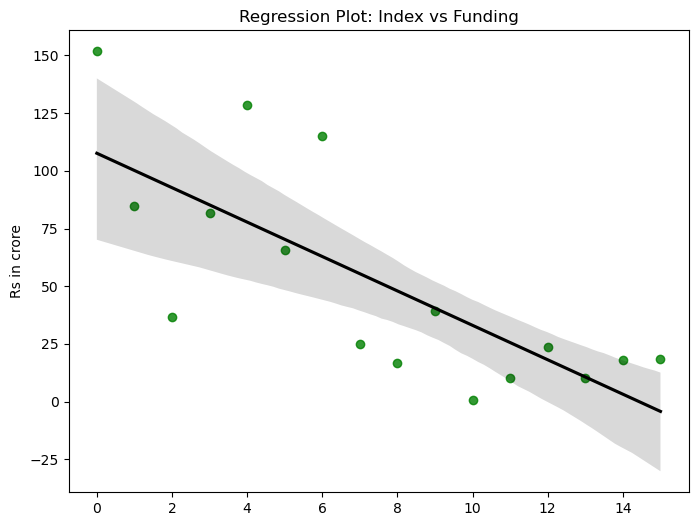

In [54]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df_cleaned.index, y='Rs in crore', data=df_cleaned, scatter_kws={'color':'green'}, line_kws={'color':'black'})
plt.title('Regression Plot: Index vs Funding')
plt.show()

Report on Government Expenditures Across Industries

1. Introduction
The dataset provides an overview of government investments or expenditures across various industries in India. It includes information about financial allocations in crores of rupees for sectors such as hospitality, healthcare, construction, food & beverages, and engineering. Analyzing this data helps in understanding government priorities and the distribution of resources across different economic domains.

2. Objectives
The primary objectives of this analysis are:

To examine government spending patterns across industries.

To identify key sectors receiving higher financial allocations.

To assess the economic focus areas of the government.

To provide insights for policymakers, businesses, and researchers.

3. Data Overview
The dataset includes the following key attributes:

Serial Number: A unique identifier for each industry.

Industry Name: The sector receiving government expenditure.

Financial Allocation (Rs in Crore): The amount allocated to the respective industry.

Additional Columns: Some unnamed columns that may require further examination for relevance.

4. Key Findings

The hospitality sector (hotels and restaurants) has received significant financial allocations, highlighting the government's focus on tourism and service industries.

The healthcare sector also receives substantial funding, reflecting investments in public health and medical infrastructure.

Construction and engineering industries are among the recipients, emphasizing government efforts towards infrastructure development.

Food and beverage industries have notable allocations, indicating support for food security and agricultural processing.

Some columns contain missing or unnamed data, which might need further clarification or cleaning.

5. Implications and Recommendations

For Policymakers: Understanding sector-wise expenditure can aid in strategic planning and better resource allocation.

For Businesses: Companies operating in high-funded sectors may find opportunities for growth and government collaborations.

For Researchers: The data serves as a foundation for studying economic policies and investment trends across industries.

6. Conclusion
The dataset provides valuable insights into government expenditures across various industries. By analyzing sector-wise allocations, stakeholders can gain a better understanding of economic priorities and policy directions. Future studies can enhance this analysis by integrating more financial details, project-specific data, and economic impact assessments.